# Project III: Cars4U

Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

Objective

 Explore and visualize the dataset.
 Build a linear regression model to predict the prices of used cars.
 Generate a set of insights and recommendations that will help the business.
Data Dictionary 

 S.No. : Serial Number
 Name : Name of the car which includes Brand name and Model name
 Location : The location in which the car is being sold or is available for purchase Cities
 Year : Manufacturing year of the car
 Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
 Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
 Transmission : The type of transmission used by the car. (Automatic / Manual)
Owner : Type of ownership
 Mileage : The standard mileage offered by the car company in kmpl or km/kg
 Engine : The displacement volume of the engine in CC.
 Power : The maximum power of the engine in bhp.
 Seats : The number of seats in the car.
 New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
 Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)


# Importing Necessary Packages

In [166]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)

import re

from math import sqrt 
from sklearn.metrics import mean_squared_log_error

import lightgbm as lgb
from sklearn.model_selection import KFold

import pandas_profiling

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# Reading Data File

In [167]:
data = pd.read_csv("used_cars_data.csv")
df = data.copy() # Copying data to avoid unwanted changes to data
print(f'This data set contains {df.shape[0]} rows and {df.shape[1]} columns.')

This data set contains 7253 rows and 14 columns.


In [168]:
#Printing 5 random data
np.random.seed(1)
df.sample(n=5)

S.No.                                       Name    Location  Year  \
2397   2397             Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3777   3777                     Maruti Wagon R VXI 1.2       Kochi  2015   
4425   4425                     Ford Endeavour 4x2 XLT   Hyderabad  2007   
3661   3661  Mercedes-Benz E-Class E250 CDI Avantgrade  Coimbatore  2016   
4514   4514       Hyundai Xcent 1.2 Kappa AT SX Option       Kochi  2016   

      Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage   Engine  \
2397              21460    Petrol       Manual      First  17.0 kmpl  1497 CC   
3777              49818    Petrol       Manual      First  21.5 kmpl  1197 CC   
4425             130000    Diesel       Manual      First  13.1 kmpl  2499 CC   
3661              39753    Diesel    Automatic      First  13.0 kmpl  2143 CC   
4514              45560    Petrol    Automatic      First  16.9 kmpl  1197 CC   

           Power  Seats  New_Price  Price  
2397  121.36 bhp   5.00  9.47 Lakh   6.00  
3777   81.80 bhp   5.00  5.44 Lakh   4.11  
4425     141 bhp   7.00        NaN   6.00  
3661   201.1 bhp   5.00        NaN  35.28  
4514      82 bhp   5.00        NaN   6.34

**Obervation**

* We can see that the New_Price column contains some NaN value that we will need to addres. We also see that Power, Mileage, Engine and New_Price contain units which we will fneed to address as well. 

In [169]:
# Dropping S.No Column
df.drop(['S.No.'],axis=1,inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


**Observation**

* We can see that Name, Location, Fuel_Type, Transmission, Owner_Type, Transmission, Owener_Type, Mileage, Engine, Power and New_price are of type Float
* Year, Kilometers_Driven are integers
* Seats and Price are of type integer
* We will need to convert New_Price, Engine, Mileage to categorical values

# Checking for Missing Data

In [171]:
#Checking for missing Data
pd.DataFrame( df.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

Total Missing Values
Name                                  0
Location                              0
Year                                  0
Kilometers_Driven                     0
Fuel_Type                             0
Transmission                          0
Owner_Type                            0
Mileage                               2
Engine                               46
Power                                46
Seats                                53
New_Price                          6247
Price                              1234

**Observation**
* We can see that we have quite a few missing Data in the Mileage, Engine, Power, Seats, New Price and Price columns which we will need to address

# Dividing Data into Test and Train For Processing

In [172]:
df['split'] = np.random.randn(df.shape[0], 1)

#Populating data randomly for testing and training
msk = np.random.rand(len(df)) <= 0.7

train = df[msk] # Spliting data for training
test = df[~msk] # Spliting data for testing

In [173]:
# Checkout the shape of datasets
train.shape, test.shape

((5044, 14), (2209, 14))

**Observation**
* The training data set contains 5066 rows and 15 Columns
* The testing data set contains 2187 rows and 15 Columns

# Data Profiling

In [174]:
#Let's have a look at the different aspects of the dataset using Pandas Profiling
train.profile_report(title='Pandas Profiling Report')

# Checking difference in uniqueness 

In [175]:
# Defining categorical features
categorical_feature = ['Name','Location','Fuel_Type','Transmission','Owner_Type']

In [176]:
train[categorical_feature].nunique()  #Finding unique Data in Data set

Name            1735
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
dtype: int64

In [177]:
test[categorical_feature].nunique()  #Finding unique Data in Data set

Name            1107
Location          11
Fuel_Type          4
Transmission       2
Owner_Type         4
dtype: int64

In [178]:
df[categorical_feature].nunique() #Finding unique Data in Data set

Name            2041
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
dtype: int64

**Observation**
* There is a clear difference in the uniqueness of **Name** and **Fuel_type** feature. Lets check and remove the redundant records from the training set

In [179]:
# Checking the Fuel_Type which is not in test set
list(train.Fuel_Type[~train.Fuel_Type.isin(test.Fuel_Type)].unique())

['Electric']

**Observation**
* There are **no** Electric vehicles in the **test** dataset. Hence, we remove the rows from training dataset where **Fuel_type** is **Electric**

In [180]:
train = train[train.Fuel_Type != 'Electric'] 

# Checking Name Patterns

In [181]:
train["Full_name"] = train.Name.copy()
test["Full_name"] = test.Name.copy()
train.Name.sample(10)

3272                BMW 5 Series 520d Sedan
4174                       Honda Brio VX AT
4422                     Hyundai i10 Sportz
234                    Ford Figo Diesel EXI
3452                 Maruti Swift Dzire VXI
3308    Hyundai Sonata Transform 2.4 GDi MT
352                     Maruti Alto K10 VXI
4927             Skoda Rapid 1.6 TDI Active
3550                   Honda City i-DTEC ZX
4176                  Hyundai i10 Magna 1.1
Name: Name, dtype: object

**Oberservation**

* Car name contains both Engine size, car type and other info. Lets find unique car brands in the train set which are **not** in test set

In [182]:
# Finding unique names in train data set but not in test
temp1 = list(train.Name.str.split(' ').str[0].unique())
temp2 = list(test.Name.str.split(' ').str[0].unique())
temp3 = [item for item in temp1 if item not in temp2]
temp3

['Smart', 'Force', 'Lamborghini', 'Hindustan', 'OpelCorsa']

In [183]:
#Removing the records which contains these brands from the train set first
train = train[~train.Name.str.contains('|'.join(temp3))]

In [184]:
def remove_char(str):
    '''This function will be used to remove special characters like [- . /()] etc'''
    arr = ' '.join(str.split()) #replace multiple spaces to single space
    arr = re.sub(r"[-(){}<>/\.,]","", arr) #remove special characters
    return arr.lower() #lowercase all characters

In [185]:
#Removing Special characters from Name
train.Full_name = train.Name.apply(lambda x: remove_char(x))
test.Full_name = test.Name.apply(lambda x: remove_char(x))

In [186]:
# Updating name to only keep first 2 relevant words in the car names and remove the rest to be consistent across the dataset
train.Name = train.Full_name.apply(lambda x: " ".join(x.split(' ')[:2]))
test.Name = test.Full_name.apply(lambda x: " ".join(x.split(' ')[:2]))

# Filter brand name for a more generic aggregation in further calculations
train['brand'] = train.Name.apply(lambda x: " ".join(x.split(' ')[:1]))
test['brand'] = test.Name.apply(lambda x: " ".join(x.split(' ')[:1]))

In [187]:
#Checking Name to check it was successfully updated
train.sample(5)

Name    Location  Year  Kilometers_Driven Fuel_Type  \
6849   toyota etios     Chennai  2011              47000    Petrol   
4996     honda city       Delhi  2009              71499    Petrol   
6127    honda amaze   Hyderabad  2015              69150    Diesel   
4799  hyundai xcent  Coimbatore  2015              45960    Petrol   
1914  hyundai xcent     Chennai  2017              46000       CNG   

     Transmission Owner_Type     Mileage   Engine      Power  Seats New_Price  \
6849       Manual     Second   17.6 kmpl  1496 CC  88.73 bhp   5.00       NaN   
4996       Manual      First   17.0 kmpl  1497 CC    118 bhp   5.00       NaN   
6127       Manual      First   25.8 kmpl  1498 CC   98.6 bhp   5.00       NaN   
4799       Manual      First   19.1 kmpl  1197 CC     82 bhp   5.00       NaN   
1914       Manual      First  25.0 km/kg  1197 CC  81.86 bhp   5.00       NaN   

      Price  split                            Full_name    brand  
6849    nan  -0.08                       toyota etios g   toyota  
4996   3.00  -0.40                   honda city 15 s mt    honda  
6127    nan  -0.02                 honda amaze sx idtec    honda  
4799   5.56  -0.26             hyundai xcent 12 kappa s  hyundai  
1914   4.95  -0.90  hyundai xcent 12 kappa s option cng  hyundai

**Observation**
* Everything Looks good. Name was successfully updated.

# Updating Categorical Values

In [188]:
# Define function to correct the New_Price value
def price_correct(x):
    ''' This function will remove suffix from column and convert column to a float'''
    if str(x).endswith('Lakh'):
        return float(str(x).split()[0])*100000
    elif str(x).endswith('Cr'):
        return float(str(x).split()[0])*10000000
    else:
        return x

train.New_Price = train.New_Price.apply(price_correct)
test.New_Price = test.New_Price.apply(price_correct)

In [189]:
train.Mileage = train.Mileage.replace('0.0 kmpl', np.NaN).apply(lambda x: str(x).split()[0]).astype(float).round(2) # Convert 0 value to Nan, remove unit and convert to float type and round off to 2 decimal place.
train.Engine = train.Engine.apply(lambda x: str(x).split()[0]).astype(float) # Remove the CC part
train.Power = train.Power.replace('null bhp', np.NaN).apply(lambda x: str(x).split()[0]).astype(float).round(2) # convert null value to NaN than as above

test.Mileage = test.Mileage.replace('0.0 kmpl', np.NaN).apply(lambda x: str(x).split()[0]).astype(float).round(2)
test.Engine = test.Engine.apply(lambda x: str(x).split()[0]).astype(float)
test.Power = test.Power.replace('null bhp', np.NaN).apply(lambda x: str(x).split()[0]).astype(float).round(2)

# Filling Missing Value

In [190]:
# Fill missing values aggregating by Name mean and median
train.Engine = train.groupby('Name').Engine.apply(lambda x: x.fillna(x.median()))
train.Power = train.groupby('Name').Power.apply(lambda x: x.fillna(x.mean()))
train.Mileage = train.groupby('Name').Mileage.apply(lambda x: x.fillna(x.mean()))
train.Seats = train.groupby('Name').Seats.apply(lambda x: x.fillna(x.median()))
train.New_Price = train.groupby('Name').New_Price.apply(lambda x: x.fillna(x.mean()))
train.Price = train.groupby('Name').Price.apply(lambda x: x.fillna(x.mean()))

test.Engine = test.groupby('Name').Engine.apply(lambda x: x.fillna(x.median()))
test.Power = test.groupby('Name').Power.apply(lambda x: x.fillna(x.mean()))
test.Mileage = test.groupby('Name').Mileage.apply(lambda x: x.fillna(x.mean()))
test.Seats = test.groupby('Name').Seats.apply(lambda x: x.fillna(x.median()))
test.New_Price = test.groupby('Name').New_Price.apply(lambda x: x.fillna(x.mean()))
test.Price = test.groupby('Name').Price.apply(lambda x: x.fillna(x.mean()))

# Fill remaining missing values aggregating by brand mean and median
train.Power = train.groupby('brand').Power.apply(lambda x: x.fillna(x.mean()))
train.Mileage = train.groupby('brand').Mileage.apply(lambda x: x.fillna(x.mean()))
train.Seats = train.groupby('brand').Seats.apply(lambda x: x.fillna(x.median()))
train.New_Price = train.groupby('brand').New_Price.apply(lambda x: x.fillna(x.mean()))
train.Price = train.groupby('brand').Price.apply(lambda x: x.fillna(x.mean()))

test.Mileage = test.groupby('brand').Mileage.apply(lambda x: x.fillna(x.mean()))
test.Engine = test.groupby('brand').Engine.apply(lambda x: x.fillna(x.mean()))
test.Power = test.groupby('brand').Power.apply(lambda x: x.fillna(x.mean()))
test.Seats = test.groupby('brand').Seats.apply(lambda x: x.fillna(x.mean()))


test.Power = test.groupby('brand').Power.apply(lambda x: x.fillna(x.mean()))
test.New_Price = test.groupby('brand').New_Price.apply(lambda x: x.fillna(x.mean()))
test.Price = test.groupby('brand').Price.apply(lambda x: x.fillna(x.mean()))

# Fill remaining missing values aggregating by whole column mean
train.New_Price = train.New_Price.fillna(train.New_Price.mean())
train.Price = train.Price.fillna(train.New_Price.mean())
test.Power = test.Power.fillna(test.New_Price.mean())
test.New_Price = test.New_Price.fillna(test.New_Price.mean())
test.Price = test.Price.fillna(test.New_Price.mean())


In [191]:
#Checking for missing Data
pd.DataFrame( train.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

Total Missing Values
Name                                  0
Location                              0
Year                                  0
Kilometers_Driven                     0
Fuel_Type                             0
Transmission                          0
Owner_Type                            0
Mileage                               0
Engine                                0
Power                                 0
Seats                                 0
New_Price                             0
Price                                 0
split                                 0
Full_name                             0
brand                                 0

**Observation**
* As we can see no missing data in the training data set

In [192]:
#Checking for missing Data
pd.DataFrame( test.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

Total Missing Values
Name                                  0
Location                              0
Year                                  0
Kilometers_Driven                     0
Fuel_Type                             0
Transmission                          0
Owner_Type                            0
Mileage                               0
Engine                                0
Power                                 0
Seats                                 0
New_Price                             0
Price                                 0
split                                 0
Full_name                             0
brand                                 0

**Observation**
* As we can see no missing data in testing data set

In [193]:
# Defining a function to plot the distribution of various features
def count_plot(data,col,figx,figy,rotate = 'N', order = 'Y'):
    plt.figure(figsize=(figx, figy));
    if order == 'Y':
        g = sns.countplot(x=col, data=data, order = data[col].value_counts().index)
    else:
        g = sns.countplot(x=col, data=data)
    plt.title('Distribution of %s' %col);
    if rotate == 'Y':
        plt.xticks(rotation=45);
    ax=g.axes
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / data.shape[0]:.2f}%",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', 	# horizontal alignment
                     va='top',		# Vertical alignment
                     fontsize=10,	# Fontsize
                     color='black',	# Color set
                     rotation=0,	# Rotation type
                     xytext=(0,10),	# caption position
                     textcoords='offset points' # Caption placement
                    ) 


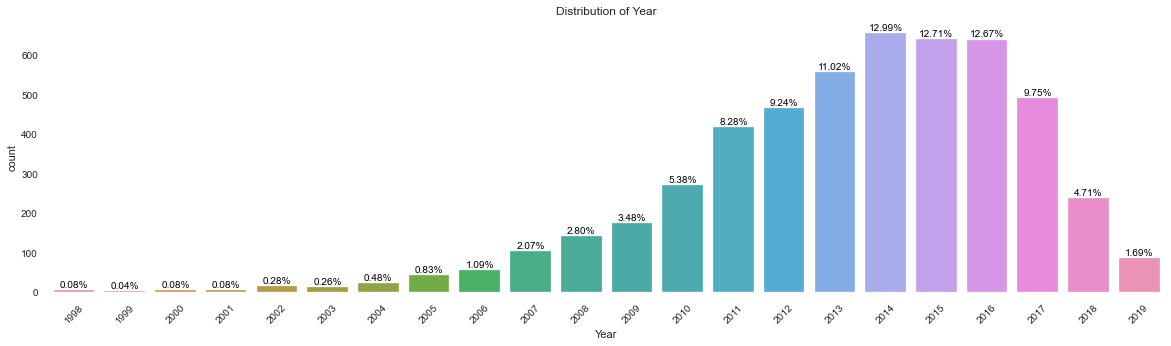

In [194]:
# Check the Year make distribution of the Training data
count_plot(train,'Year',20,5,rotate = 'Y', order = 'N')

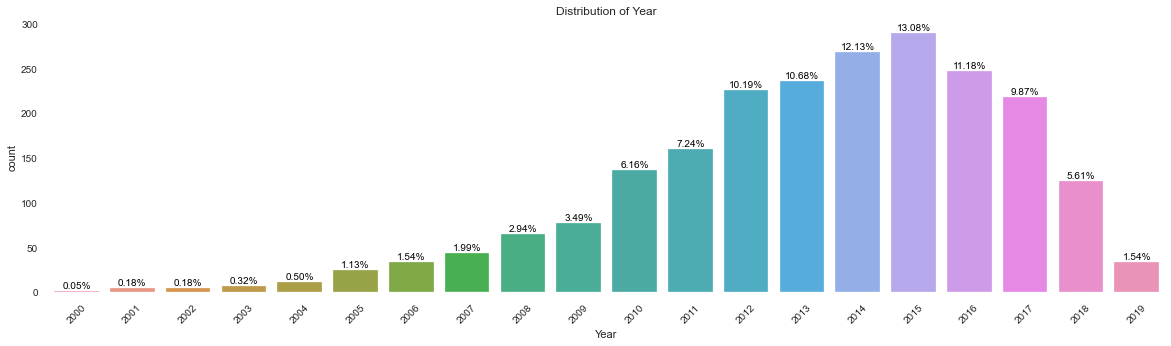

In [195]:
# Check the Year make distribution of the Test data
count_plot(test,'Year',20,5,rotate = 'Y', order = 'N')

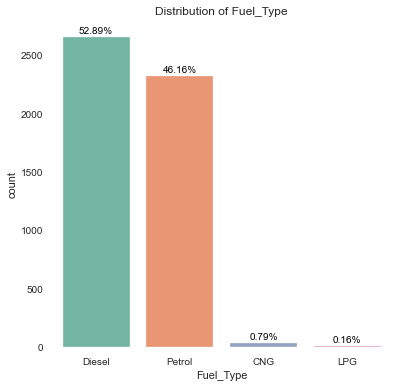

In [196]:
# Check the Fuel type distribution of the Training data
count_plot(train,'Fuel_Type',6,6)

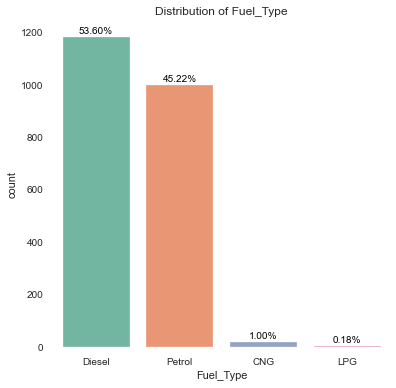

In [197]:
# Check the Fuel type distribution of the Test data
count_plot(test,'Fuel_Type',6,6)

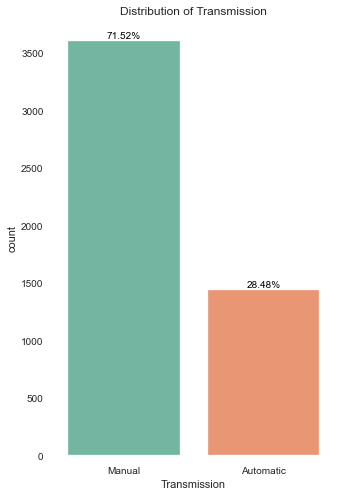

In [198]:
# Check the Transmission distribution of the Training data
count_plot(train,'Transmission',5,8)

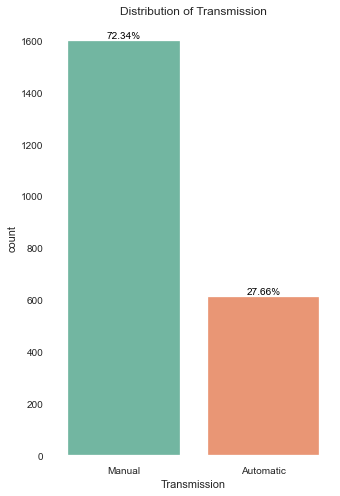

In [199]:
# Check the Transmission distribution of the Test data
count_plot(test,'Transmission',5,8)

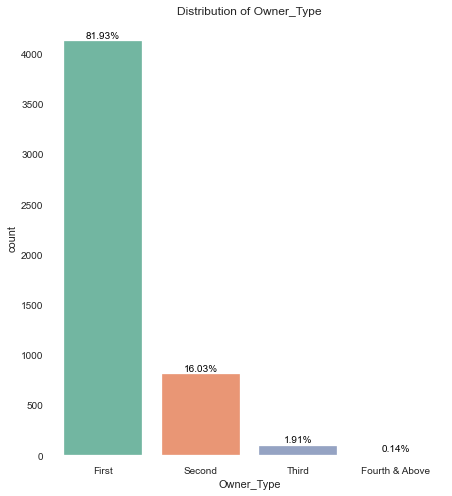

In [200]:
# Check the Owner Type distribution of the Training data
count_plot(train,'Owner_Type',7,8)

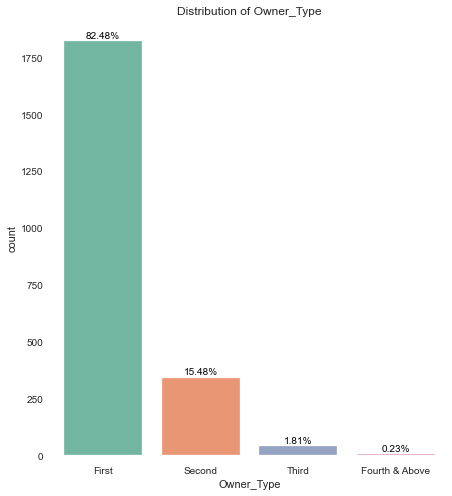

In [201]:
# Check the Owner Type distribution of the Test data
count_plot(test,'Owner_Type',7,8)

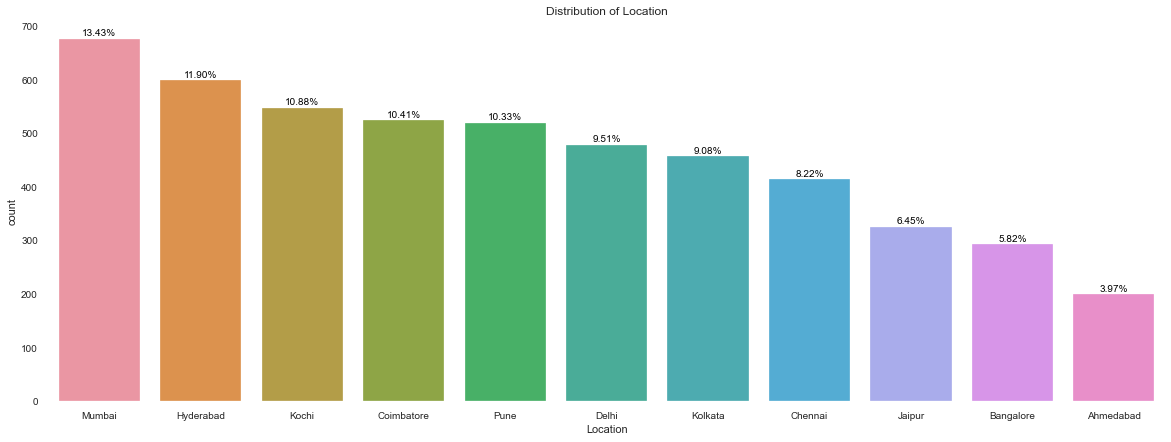

In [202]:
# Check the Location distribution of the Training data
count_plot(train,'Location',20,7)

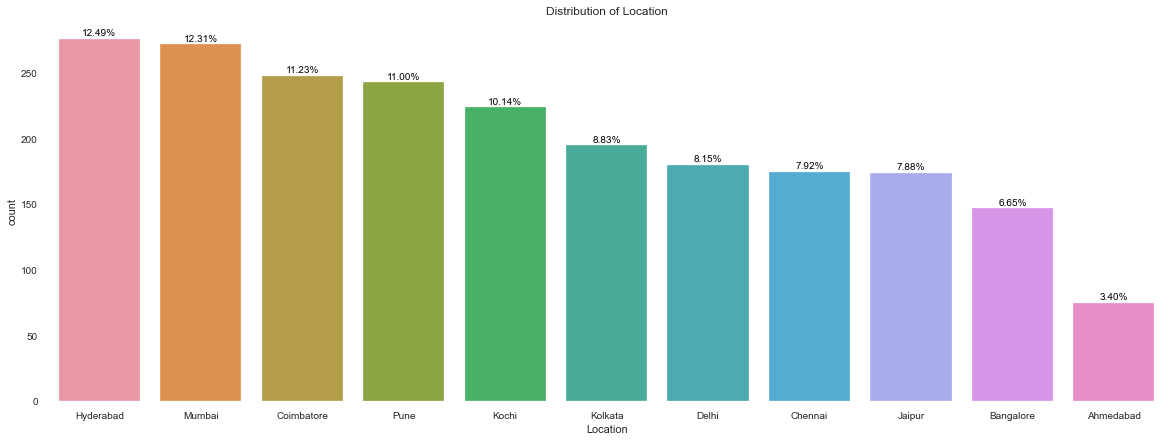

In [203]:
# Check the Location distribution of the Test data
count_plot(test,'Location',20,7)

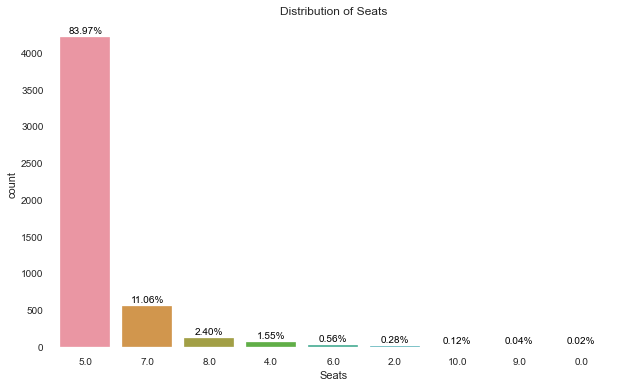

In [204]:
# Check the seats distribution of the Train data
count_plot(train,'Seats',10,6)

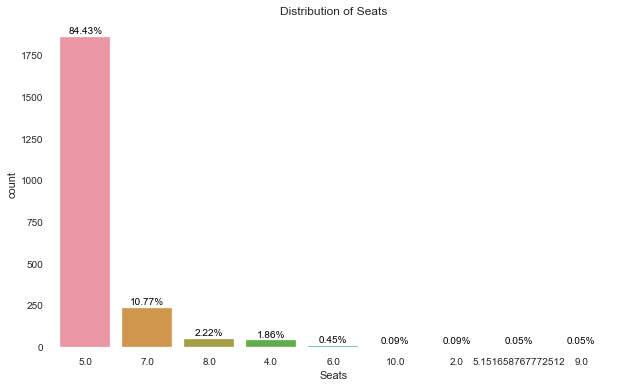

In [205]:
# Check the Seats distribution of the Test data
count_plot(test,'Seats',10,6)

**Observation**
* We observed that there are no vehicles with 0 or 9 seats in the test set. Lets check cars with 0,2,9 and 10 seats in the training data and adjust the training data to align with the test set.

In [206]:
train[train.Seats.isin([0,2,9,10])]

Name    Location  Year  Kilometers_Driven Fuel_Type  \
134        mercedesbenz slc     Kolkata  2017              13372    Petrol   
557                 audi tt       Delhi  2013              12100    Petrol   
693   mercedesbenz slkclass  Coimbatore  2016              22732    Petrol   
798   mercedesbenz slkclass   Bangalore  2015              10000    Petrol   
814           toyota qualis        Pune  2004              77757    Diesel   
917               tata sumo      Mumbai  2013              20000    Diesel   
926          porsche cayman   Hyderabad  2010              10000    Petrol   
1078        porsche boxster     Kolkata  2015              10512    Petrol   
1288                audi tt       Kochi  2014              14262    Petrol   
1907          toyota qualis   Bangalore  2002              63000    Diesel   
2267          toyota qualis        Pune  2004             215750    Diesel   
2305         porsche cayman      Mumbai  2011               8000    Petrol   
2312       chevrolet tavera     Kolkata  2012              67132    Diesel   
2359          mahindra xylo     Chennai  2016             150000    Diesel   
2575       chevrolet tavera   Hyderabad  2015             120000    Diesel   
3999                audi a4   Hyderabad  2012             125000    Petrol   
4691  mercedesbenz slkclass   Bangalore  2014               3000    Petrol   
4722   mercedesbenz slclass     Kolkata  2010              35000    Petrol   
4893                 bmw z4       Kochi  2018               9952    Petrol   
5294                 bmw z4       Delhi  2011              25000    Petrol   
5919               jaguar f   Hyderabad  2015               8000    Petrol   
6288       chevrolet tavera   Hyderabad  2005             150000    Diesel   
6842            nissan 370z     Kolkata  2012              14850    Petrol   

     Transmission Owner_Type  Mileage  Engine  Power  Seats   New_Price  \
134     Automatic      First    19.00 2996.00 362.07   2.00  9504000.00   
557     Automatic      First     9.90 1984.00 207.80   2.00  6420479.53   
693     Automatic      First    18.10 3498.00 306.00   2.00  6447708.49   
798     Automatic      First    18.10 3498.00 306.00   2.00  6447708.49   
814        Manual     Second    13.10 2446.00  75.00  10.00  2406744.33   
917        Manual      First    14.07 1978.00  83.10  10.00   974272.48   
926        Manual      First     9.00 3436.00 333.37   2.00 13600000.00   
1078    Automatic      First     8.60 2706.00 265.00   2.00 13600000.00   
1288    Automatic      First     9.90 1984.00 207.80   2.00  6420479.53   
1907       Manual      Third    13.10 2446.00  75.00  10.00  2406744.33   
2267       Manual     Second    13.10 2446.00  75.00  10.00  2406744.33   
2305    Automatic      First     9.00 3436.00 333.37   2.00 13600000.00   
2312       Manual      First    13.58 2499.00  78.00   9.00  2185926.01   
2359       Manual      First    14.95 2489.00  93.70   9.00  1171333.33   
2575       Manual      First    14.80 2499.00  80.00  10.00  2185926.01   
3999    Automatic      First    10.50 3197.00 161.60   0.00  5478666.67   
4691    Automatic     Second    12.00 5461.00 421.00   2.00  6447708.49   
4722    Automatic      First     8.10 5461.00 387.30   2.00  6447708.49   
4893    Automatic      First    10.37 2979.00 306.00   2.00  6476749.35   
5294    Automatic      First    10.37 2979.00 306.00   2.00  6476749.35   
5919    Automatic      First    12.50 5000.00 488.10   2.00  6708041.67   
6288       Manual     Second    14.80 2499.00  80.00  10.00  2185926.01   
6842    Automatic      First    10.00 3696.00 328.50   2.00  1154260.27   

      Price  split                              Full_name         brand  
134   54.00   0.25                mercedesbenz slc 43 amg  mercedesbenz  
557   29.50  -0.39                        audi tt 20 tfsi          audi  
693   55.54   0.82          mercedesbenz slkclass slk 350  mercedesbenz  
798   55.00  -0.53          mercedesbenz slkclass slk

**Observation**

* The data looks good except for only some records with 0 and 9 seats. Lets fill the 0 audi a4 seat with 5 seats and the other vehicle having 9 seats with 10 seats.

In [207]:
train.loc[3999,'Seats'] = 5 # Feeling Seat information for the Audi A4 to 5 seats

train.Seats[train.Seats == 9] = 10 #Feeling the information for the Cars with 9 seats to 10

Let's checkout the power, Mileage and Engine distribution across the Training and the test set

In [208]:
# Define function for the next set of graph distributions.
def dist_plot(data, col, bins, color, figx, figy, kde = True):
    plt.figure(figsize=(figx,figy))
    sns.distplot(data[col].values, bins=bins, color=color, kde_kws={"shade": True}, label="Low", kde=kde)
    plt.title("Histogram of %s Distribution"%col)
    plt.xlabel('%s'%col, fontsize=12)
    plt.ylabel('Vehicle Count', fontsize=12)
    plt.show();

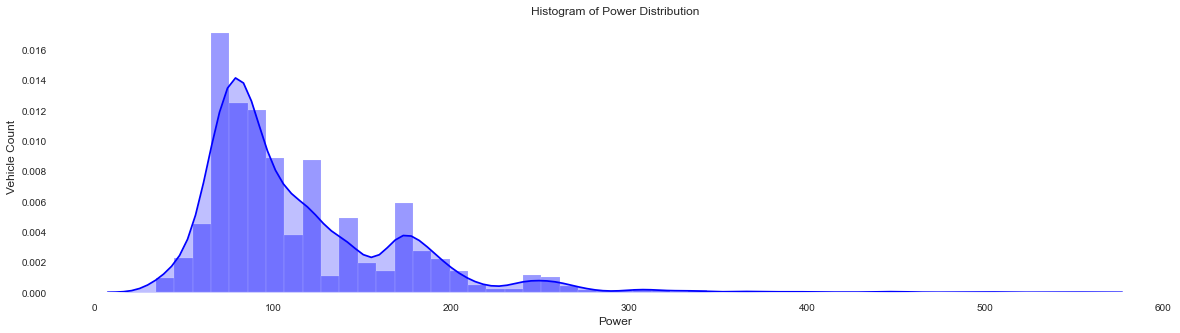

In [209]:
# Check the Power distribution of the Train data
dist_plot(train,'Power', 50, 'blue', 20, 5)

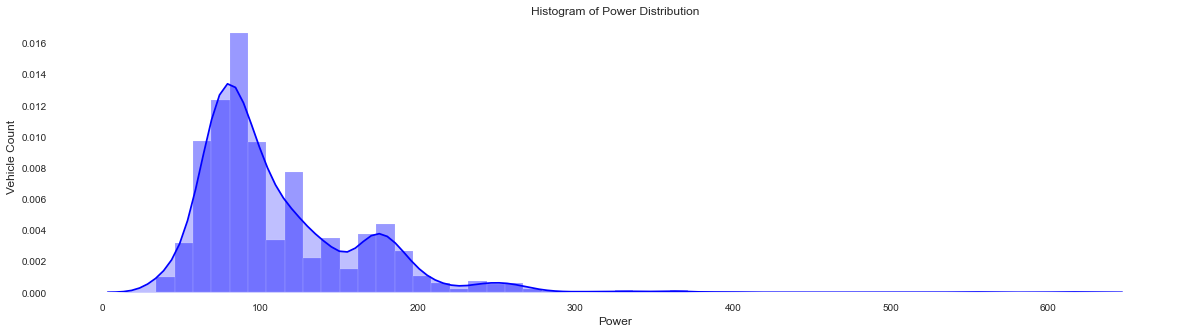

In [210]:
# Check the Power distribution of the Test data
dist_plot(test,'Power', 50, 'blue', 20, 5)

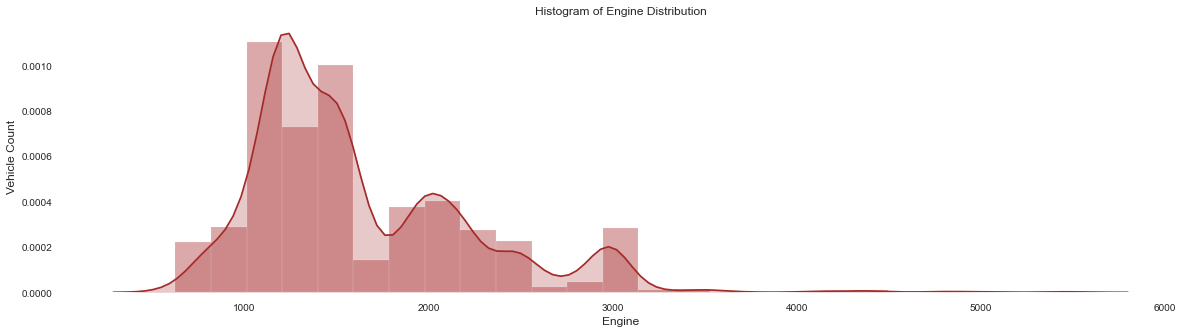

In [211]:
# Check the Power distribution of the Train data
dist_plot(train,'Engine', 25, 'brown', 20, 5)

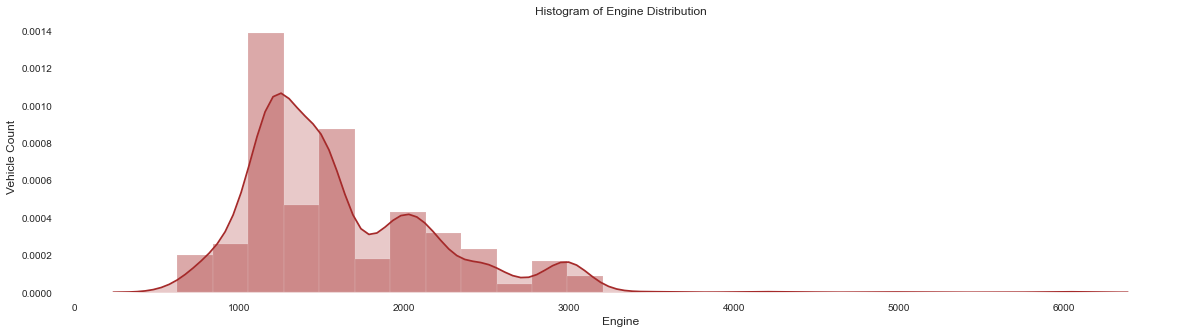

In [212]:
# Check the Power distribution of the Test data
dist_plot(test,'Engine', 25, 'brown', 20, 5)

**Observation**
* Engine Data seems to be consistent across both the sets. Lets check the Mileage distribution

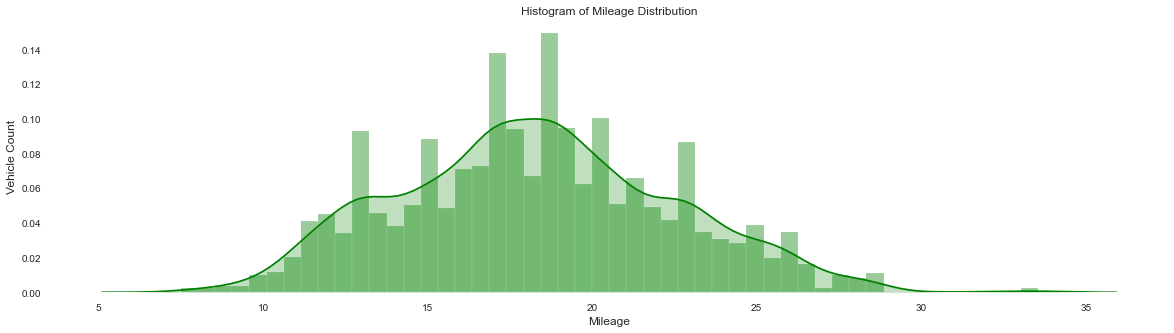

In [213]:
# Check the Power distribution of the Train data
dist_plot(train,'Mileage', 50, 'green', 20, 5)

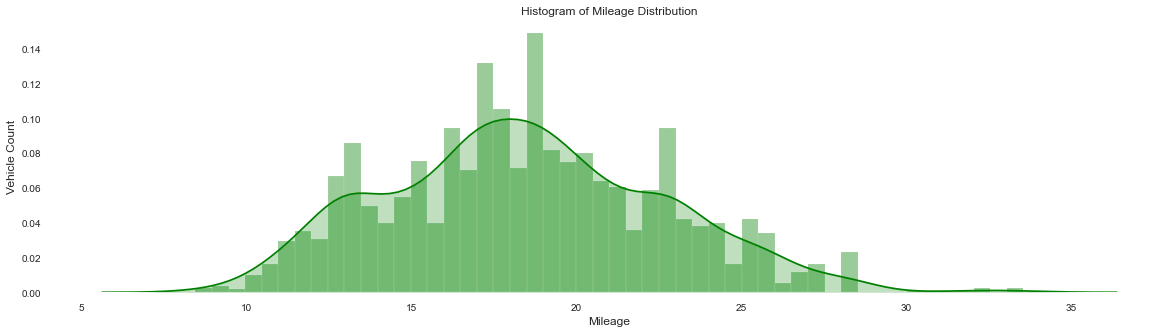

In [214]:
# Check the Power distribution of the Test data
dist_plot(test,'Mileage', 50, 'green', 20, 5)

**Observation**
* Mileage records are also similarly distributed in both the sets. Lets check Kilometers_Driven data now

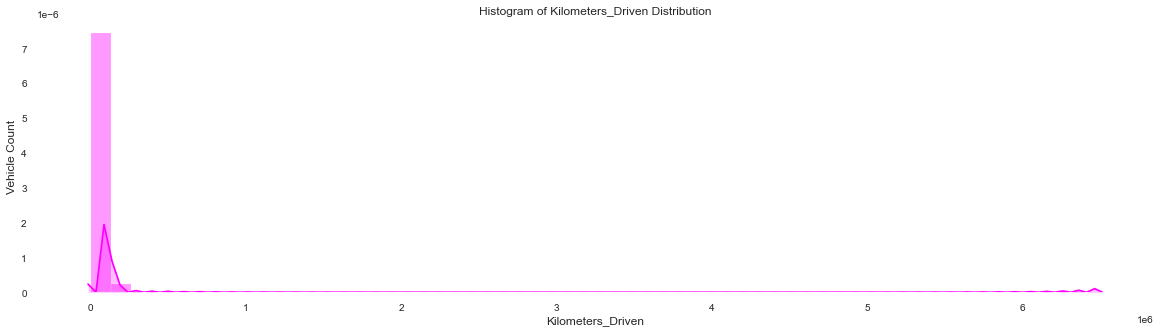

In [215]:
# Check the Power distribution of the Training data
dist_plot(train,'Kilometers_Driven', 50, 'magenta', 20, 5)

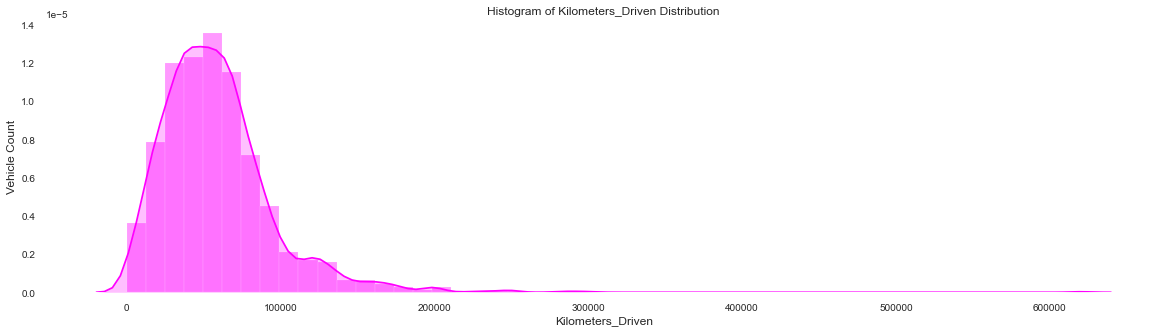

In [216]:
# Check the Power distribution of the Test data
dist_plot(test,'Kilometers_Driven', 50, 'magenta', 20, 5)

**Observation**
* Here we can see that the data in training set is highly skewed which is a pointer to outliers. Lets check those black birds

In [217]:
col = 'Kilometers_Driven'
from scipy import stats
outliers = train[col][(np.abs(stats.zscore(train[col])) > 3)]
outliers

340      775000
1860     720000
2328    6500000
2823     480000
3092     480000
4491     445000
Name: Kilometers_Driven, dtype: int64

# Checking the same records for these outlier values

In [218]:
train[train.Kilometers_Driven.isin(outliers)]

Name   Location  Year  Kilometers_Driven Fuel_Type  \
340      skoda octavia    Kolkata  2013             775000    Diesel   
1860  volkswagen vento    Chennai  2013             720000    Diesel   
2328            bmw x5    Chennai  2017            6500000    Diesel   
2823  volkswagen jetta    Chennai  2015             480000    Diesel   
3092        honda city    Kolkata  2015             480000    Petrol   
4491       hyundai i20  Bangalore  2013             445000    Petrol   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_Price  Price  \
340     Automatic      First    19.30 1968.00 141.00   5.00 2583000.00   7.50   
1860       Manual      First    20.54 1598.00 103.60   5.00 1356444.44   5.90   
2328    Automatic      First    15.97 2993.00 258.00   5.00 6476749.35  65.00   
2823    Automatic      First    16.96 1968.00 138.03   5.00 1138361.47  13.00   
3092       Manual      First    17.40 1497.00 117.30   5.00 1409058.82   5.00   
4491       Manual      First    18.50 1197.00  82.90   5.00 1049000.00   4.45   

      split                                      Full_name       brand  
340   -0.40          skoda octavia ambition plus 20 tdi at       skoda  
1860  -0.56               volkswagen vento diesel highline  volkswagen  
2328  -0.87                      bmw x5 xdrive 30d m sport         bmw  
2823  -0.44  volkswagen jetta 20132015 20l tdi highline at  volkswagen  
3092   0.14                           honda city i vtec sv       honda  
4491   2.44                  hyundai i20 magna optional 12     hyundai

**Observation**
* No other ambiguity found except the KM driven values. Let's remove these and check the distribution

In [219]:
# Removing KM Driven Values
train = train[~train.Kilometers_Driven.isin(outliers)]

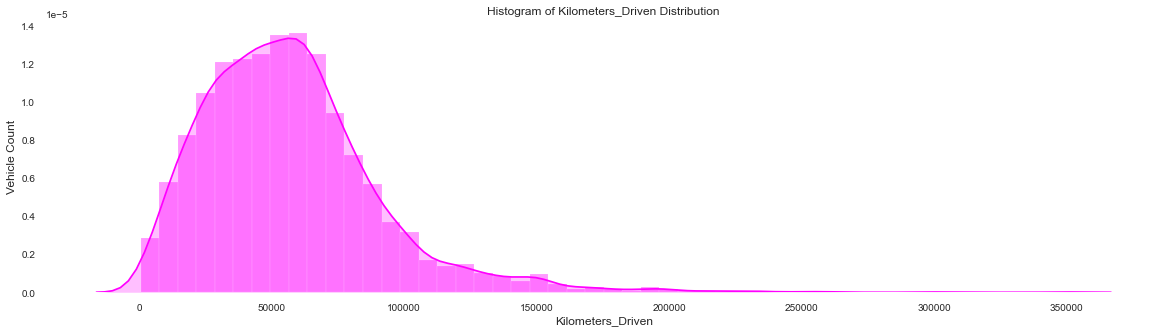

In [220]:
dist_plot(train,'Kilometers_Driven', 50, 'magenta', 20, 5, kde = True)

**Observation**

* Now the Kilometers_Driven distribution of the training set looks more meaningful and in-sync with the test set
* Let's move on and create new features from the existing ones.


In [221]:
# Record the age of the car
import datetime
train['Age'] = datetime.datetime.now().year - train['Year']
test['Age'] = datetime.datetime.now().year - test['Year']

In [222]:
# Record the number of words in the Full_name of the car
train['Name_length'] = train.Full_name.apply(lambda x: len(str(x).split(' ')))
test['Name_length'] = test.Full_name.apply(lambda x: len(str(x).split(' ')))

In [223]:
# Define categorical features
categorical_features = ['Location','Fuel_Type','Transmission','Owner_Type','Seats']

# Define function for dummy operation
def get_dummies(dataframe,feature_name):
  dummy = pd.get_dummies(dataframe[feature_name], prefix=feature_name)
  dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
  return pd.concat([dataframe,dummy], axis = 1)

# Dummify categorical features
for i in categorical_features:
    train = get_dummies(train, i)
    test = get_dummies(test, i)

In [224]:
# Define function to aggregate metrics for different features
def aggregate_features(data):   
    
    aggregate_dict = {  'Age' : ['count'],
                        'Mileage' : ['sum','max','min','mean','std','median','skew'],
                        'Power' : ['sum','max','min','mean','std','median','skew'],
                        'Engine' : ['sum','max','min','mean','std','median','skew']}
    
    data_agg = data.groupby(['Name']).agg(aggregate_dict)
    data_agg.columns = ['_'.join(col).strip() for col in data_agg.columns.values]
    data_agg.reset_index(inplace=True)    
    data_agg = pd.merge(data, data_agg, on='Name', how='left')    
    return data_agg

In [225]:
# Create aggregated features
train = aggregate_features(train)
test = aggregate_features(test)

**Observation** 

* Let's check the missing values after creating the aggregated features

In [226]:
# Define categorical features
categorical_feature = ['Name','Location','Fuel_Type','Transmission','Owner_Type']

In [227]:
# Define a function to plot the distribution of various features
def count_plot(data,col,figx,figy,rotate = 'N', order = 'Y'):
    plt.figure(figsize=(figx, figy));
    if order == 'Y':
        g = sns.countplot(x=col, data=data, order = data[col].value_counts().index)
    else:
        g = sns.countplot(x=col, data=data)
    plt.title('Distribution of %s' %col);
    if rotate == 'Y':
        plt.xticks(rotation=45);
    ax=g.axes
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / data.shape[0]:.2f}%",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', 	# horizontal alignment
                     va='top',		# Vertical alignment
                     fontsize=10,	# Fontsize
                     color='black',	# Color set
                     rotation=0,	# Rotation type
                     xytext=(0,10),	# caption position
                     textcoords='offset points' # Caption placement
                    ) 

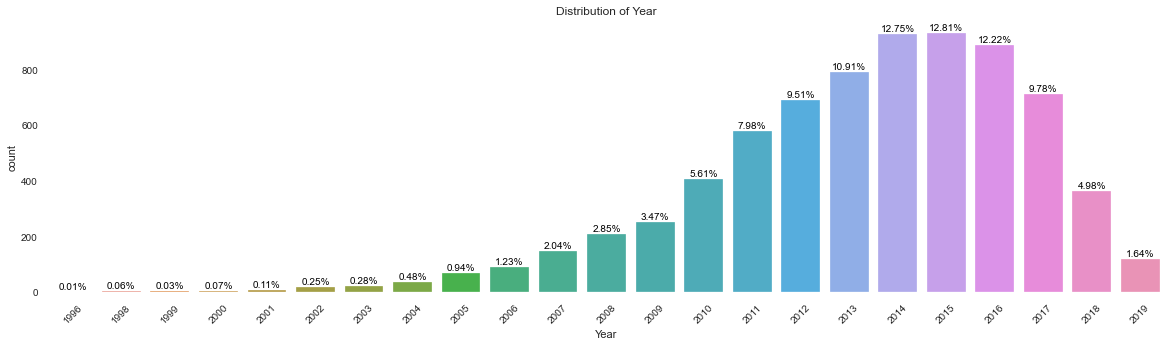

In [228]:
# Check the Year make distribution of the data
count_plot(df,'Year',20,5,rotate = 'Y', order = 'N')

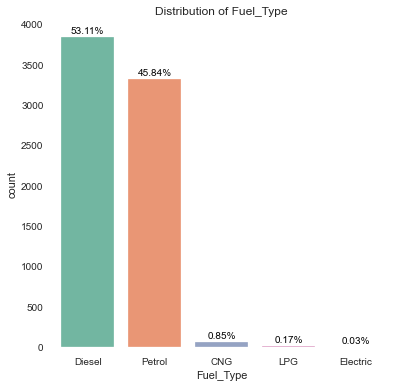

In [229]:
count_plot(df,'Fuel_Type',6,6)

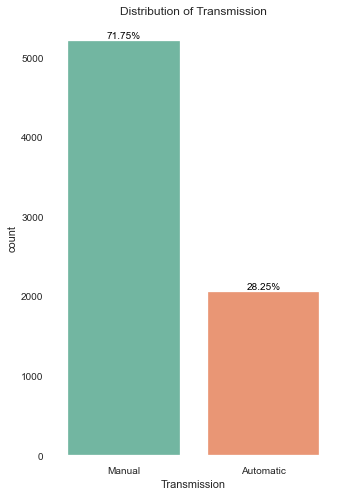

In [230]:
count_plot(df,'Transmission',5,8)

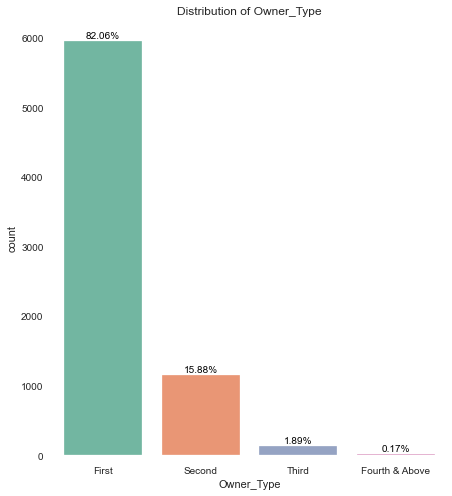

In [231]:
count_plot(df,'Owner_Type',7,8)

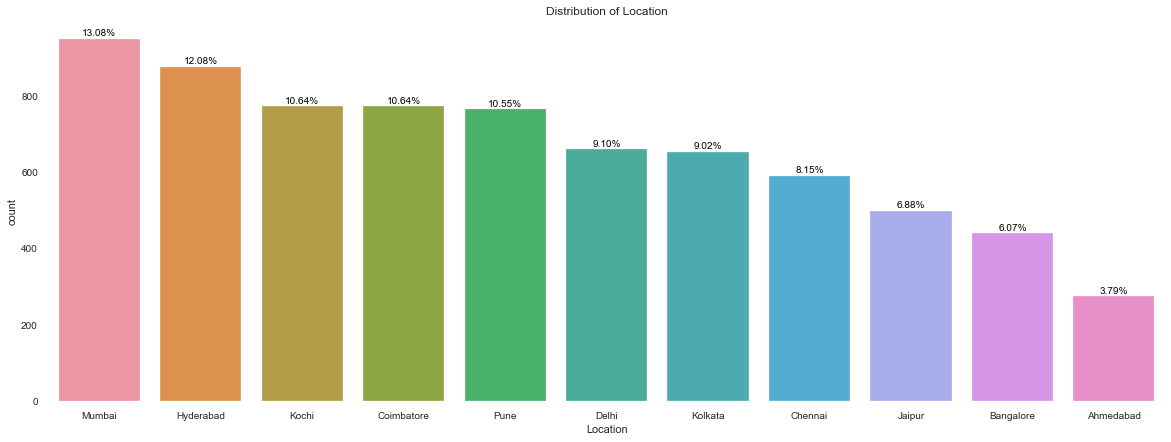

In [232]:
count_plot(df,'Location',20,7)

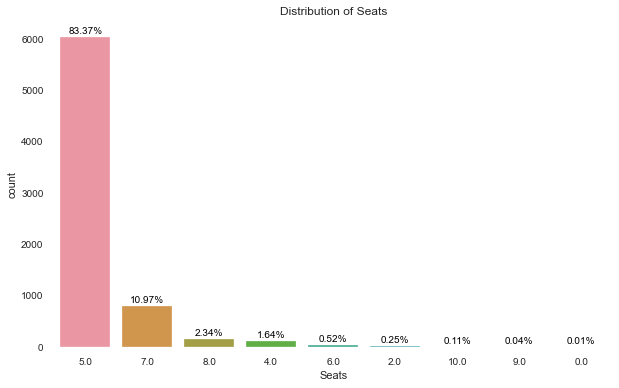

In [233]:
# Check the Transmission distribution of the Train data
count_plot(df,'Seats',10,6)

In [237]:
#Checking for missing Data
pd.DataFrame( train.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

Total Missing Values
Name                                          0
Location                                      0
Year                                          0
Kilometers_Driven                             0
Fuel_Type                                     0
Transmission                                  0
Owner_Type                                    0
Mileage                                       0
Engine                                        0
Power                                         0
Seats                                         0
New_Price                                     0
Price                                         0
split                                         0
Full_name                                     0
brand                                         0
Age                                           0
Name_length                                   0
Location_Bangalore                            0
Location_Chennai                              0
Location_Coimbatore                           0
Location_Delhi                                0
Location_Hyderabad                            0
Location_Jaipur                               0
Location_Kochi                                0
Location_Kolkata                              0
Location_Mumbai                               0
Location_Pune                                 0
Fuel_Type_Diesel                              0
Fuel_Type_LPG                                 0
Fuel_Type_Petrol                              0
Transmission_Manual                           0
Owner_Type_Fourth & Above                     0
Owner_Type_Second                             0
Owner_Type_Third                              0
Seats_4.0                                     0
Seats_5.0                                     0
Seats_6.0                                     0
Seats_7.0                                     0
Seats_8.0                                     0
Seats_10.0                                    0
Age_count                                     0
Mileage_sum                                   0
Mileage_max                                   0
Mileage_min                                   0
Mileage_mean                                  0
Mileage_std                                  18
Mileage_median                                0
Mileage_skew                                 62
Power_sum                                     0
Power_max                                     0
Power_min                                     0
Power_mean                                    0
Power_std                                    18
Power_median                                  0
Power_skew                                   62
Engine_sum                                    0
Engine_max                                    0
Engine_min                                    0
Engine_mean                                   0
Engine_std                                   18
Engine_median                                 0
Engine_skew                                  62

**Observation**

* We See that we still have 6 column with missing data

In [238]:
#Checking for missing Data
pd.DataFrame( test.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

Total Missing Values
Name                                          0
Location                                      0
Year                                          0
Kilometers_Driven                             0
Fuel_Type                                     0
Transmission                                  0
Owner_Type                                    0
Mileage                                       0
Engine                                        0
Power                                         0
Seats                                         0
New_Price                                     0
Price                                         0
split                                         0
Full_name                                     0
brand                                         0
Age                                           0
Name_length                                   0
Location_Bangalore                            0
Location_Chennai                              0
Location_Coimbatore                           0
Location_Delhi                                0
Location_Hyderabad                            0
Location_Jaipur                               0
Location_Kochi                                0
Location_Kolkata                              0
Location_Mumbai                               0
Location_Pune                                 0
Fuel_Type_Diesel                              0
Fuel_Type_LPG                                 0
Fuel_Type_Petrol                              0
Transmission_Manual                           0
Owner_Type_Fourth & Above                     0
Owner_Type_Second                             0
Owner_Type_Third                              0
Seats_4.0                                     0
Seats_5.0                                     0
Seats_5.151658767772512                       0
Seats_6.0                                     0
Seats_7.0                                     0
Seats_8.0                                     0
Seats_9.0                                     0
Seats_10.0                                    0
Age_count                                     0
Mileage_sum                                   0
Mileage_max                                   0
Mileage_min                                   0
Mileage_mean                                  0
Mileage_std                                  38
Mileage_median                                0
Mileage_skew                                 72
Power_sum                                     0
Power_max                                     0
Power_min                                     0
Power_mean                                    0
Power_std                                    38
Power_median                                  0
Power_skew                                   72
Engine_sum                                    0
Engine_max                                    0
Engine_min                                    0
Engine_mean                                   0
Engine_std                                   38
Engine_median                                 0
Engine_skew                                  72

**Observation**

* We also have 6 missing data in the train data set

# Filling values with the mean of the respective column

In [240]:
train.Mileage_skew = train.Mileage_skew.fillna(train.Mileage_skew.mean())
train.Power_skew = train.Power_skew.fillna(train.Power_skew.mean())
train.Engine_skew = train.Engine_skew.fillna(train.Engine_skew.mean())
train.Mileage_std = train.Mileage_std.fillna(train.Mileage_std.mean())
train.Power_std = train.Power_std.fillna(train.Power_std.mean())
train.Engine_std = train.Engine_std.fillna(train.Engine_std.mean())

test.Mileage_skew = test.Mileage_skew.fillna(test.Mileage_skew.mean())
test.Power_skew = test.Power_skew.fillna(test.Power_skew.mean())
test.Engine_skew = test.Engine_skew.fillna(test.Engine_skew.mean())
test.Mileage_std = test.Mileage_std.fillna(test.Mileage_std.mean())
test.Power_std = test.Power_std.fillna(test.Power_std.mean())
test.Engine_std = test.Engine_std.fillna(test.Engine_std.mean())

# Creating aggregated vectors for the vehicle name in each record

In [241]:
import gensim
import multiprocessing
cores = multiprocessing.cpu_count()

# Define function to add/aggregate embeddings of single token text
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [242]:
total_names = pd.concat([train.Full_name, test.Full_name], ignore_index=True)
tokens = total_names.apply(lambda x: x.split()) # tokenizing text
train_tokens = train.Full_name.apply(lambda x: x.split()) # tokenizing text
test_tokens = test.Full_name.apply(lambda x: x.split()) # tokenizing text
tokens_size = len(tokens)
train_tokens_size = len(train_tokens)
test_tokens_size = len(test_tokens)

In [243]:
model_w2v = gensim.models.Word2Vec(
            tokens,
            size=200, # desired no. of features/independent variables
            window=2, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0, # off heirarchichal softmax
            negative = 1, # for negative sampling
            workers= cores-1, # no.of cores
#             sample=.1,
            alpha=0.009, 
            min_alpha=0.0009,
#             seed=0,
#             hashfxn=hash
) 

model_w2v.train(tokens,
                total_examples= tokens_size,
                epochs=40)

(933897, 1400080)

In [96]:
wordvec_train_array = np.zeros((train_tokens_size, 200)) 
wordvec_test_array = np.zeros((test_tokens_size, 200))

for i in range(train_tokens_size):
    wordvec_train_array[i,:] = word_vector(train_tokens[i], 200)
wordvec_train_df = pd.DataFrame(wordvec_train_array)

for i in range(test_tokens_size):
    wordvec_test_array[i,:] = word_vector(test_tokens[i], 200)
wordvec_test_df = pd.DataFrame(wordvec_test_array)

In [101]:
wordvec_train_df.shape, wordvec_test_df.shape

((5050, 200), (2187, 200))

Word2Vec vectors are giving appropriate results. That's nice!!

In [102]:
model_w2v.wv.most_similar(positive="hyundai")

[('tata', 0.33298829197883606),
 ('porsche', 0.3051985502243042),
 ('nissan', 0.2888016998767853),
 ('datsun', 0.2855733036994934),
 ('bmw', 0.2802438735961914),
 ('mahindra', 0.247832790017128),
 ('go', 0.23652495443820953),
 ('volvo', 0.22151736915111542),
 ('ford', 0.19600391387939453),
 ('audi', 0.18575316667556763)]

In [103]:
# Define function for multiple aggregation on a dataframe rows
def agg_df(df):
    return pd.DataFrame(
                        {'Name_sum':df.sum(axis=1),
                         'Name_mean':df.mean(axis=1),
                         'Name_std':df.std(axis=1),
                         'Name_max':df.max(axis=1),
                         'Name_min':df.min(axis=1),
                         'Name_median':df.median(axis=1),
                         'Name_skew':df.skew(axis=1)
                        }
                       )

In [104]:
# Add aggregated features on the Name word2vec vctors.
train = pd.concat([train, agg_df(wordvec_train_df)], axis=1) 
test = pd.concat([test, agg_df(wordvec_test_df)], axis=1) 

**Observation** 
* Let's take a look at the train dataset after feature aggregation

In [105]:
train.head()

S.No.           Name    Location  Year  Kilometers_Driven Fuel_Type  \
0      2     honda jazz     Chennai  2011              46000    Petrol   
1      3  maruti ertiga     Chennai  2012              87000    Diesel   
2      4        audi a4  Coimbatore  2013              40670    Diesel   
3      5    hyundai eon   Hyderabad  2012              75000       LPG   
4      6   nissan micra      Jaipur  2013              86999    Diesel   

  Transmission Owner_Type  Mileage  Engine  Power  Seats  New_Price  Price  \
0       Manual      First    18.20 1199.00  88.70   5.00  861000.00   4.50   
1       Manual      First    20.77 1248.00  88.76   7.00 1140400.00   6.00   
2    Automatic     Second    15.20 1968.00 140.80   5.00 5391833.33  17.74   
3       Manual      First    21.10  814.00  55.20   5.00 1115482.77   2.35   
4       Manual      First    23.08 1461.00  63.10   5.00  817333.33   3.50   

   split      Full_name    brand  Age  Name_length  Location_Bangalore  \
0   0.11     honda jazz    honda    9            2                   0   
1   0.86  maruti ertiga   maruti    8            2                   0   
2  -0.44        audi a4     audi    7            2                   0   
3  -0.76    hyundai eon  hyundai    8            2                   0   
4  -1.41   nissan micra   nissan    7            2                   0   

   Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
0                 1                    0               0                   0   
1                 1                    0               0                   0   
2                 0                    1               0                   0   
3                 0                    0               0                   1   
4                 0                    0               0                   0   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                0               0                 0                0   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                1               0                 0                0   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 0              0                 1   
1              0                 1              0                 0   
2              0                 1              0                 0   
3              0                 0              1                 0   
4              0                 1              0                 0   

   Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
0                    1                          0                  0   
1                    1                          0                  0   
2                    0                          0                  1   
3                    1                          0                  0   
4                    1                          0                  0   

   Owner_Type_Third  Seats_4.0  Seats_5.0  Seats_6.0  Seats_7.0  Seats_8.0  \
0                 0          0          1          0          0          0   
1                 0          0          0          0          1          0   
2                 0          0          1          0          0          0   
3                 0          0          1          0          0          0   
4                 0          0          1          0          0          0   

   Seats_10.0  Age_count  Mileage_sum  Mileage_max  Mileage_min  Mileage_mean  \
0           0         55      1137.60        27.30        16.00         20.68   
1           0         68      1396.63        25.47        16.02         20.54   
2           0         66      1082.64        18.25        10.50         16.40   
3           0         57      1204.70        22.00        20.30        

**Observation** 

* Let's have a look at the correlation between various relevant features through Heatmap

[MLENS] backend: threading


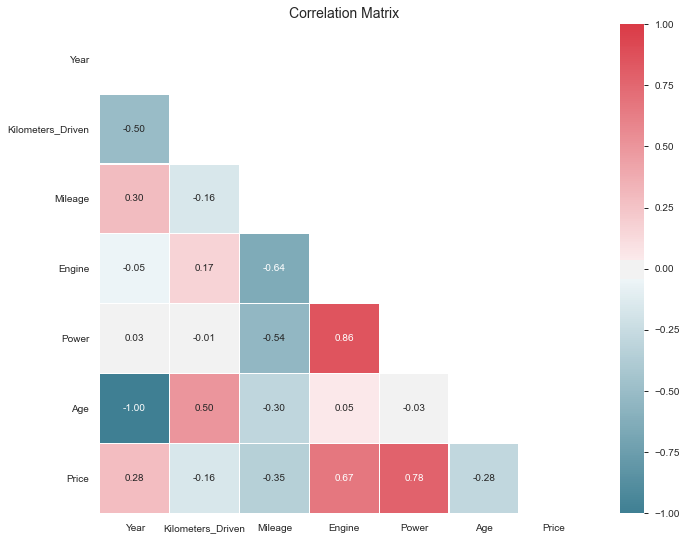

In [113]:
features = ['Year','Kilometers_Driven','Mileage','Engine','Power','Age','Price']

# Through CORRMAT
from mlens.visualization import corrmat
corrmat(train[features].corr(), inflate=False)
plt.show();

**Observation**

* Power and Engine are highly correlated.
* Price has good correlation with Engine and Power.
* We can see that Price is negatively correlated with Mileage, KMs_Driven and Age which is legit
* So, let's see actual distribution as per the above correlation.

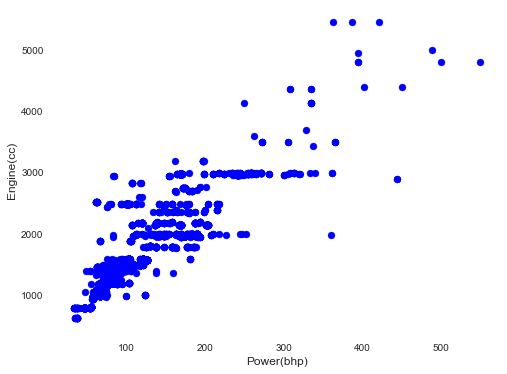

In [114]:
# Engine and Power 
plt.figure(figsize=(8,6))
plt.scatter(train.Power, train.Engine, c='blue')
plt.xlabel('Power(bhp)', fontsize=12)
plt.ylabel('Engine(cc)', fontsize=12)
plt.show();

 **Observation**
 * Both the features **Engine** and **Power** are almost **linearly** corelated

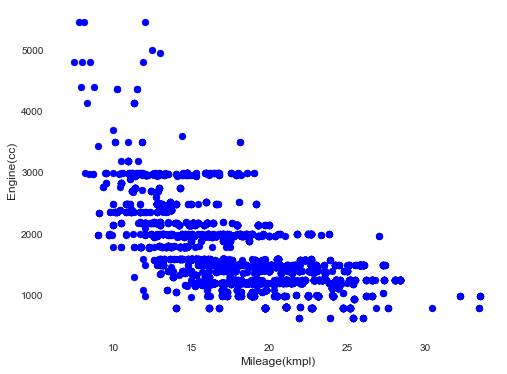

In [115]:
# Engine and Mileage 
plt.figure(figsize=(8,6))
plt.scatter(train.Mileage, train.Engine, c='blue')
plt.xlabel('Mileage(kmpl)', fontsize=12)
plt.ylabel('Engine(cc)', fontsize=12)
plt.show();

**Observation**

* That's a very legit correlation between Engine and Mileage i.e. as the Engine capacity increases its mileage decreases

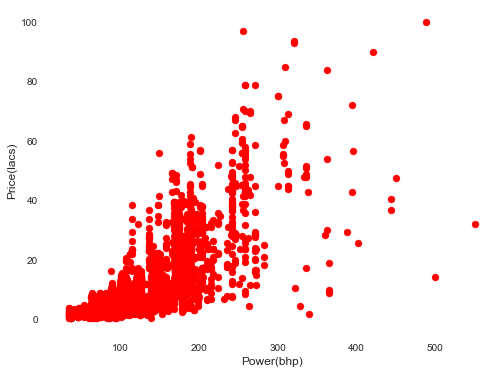

In [116]:
# Power and Price
plt.figure(figsize=(8,6))
plt.scatter(train.Power, train.Price, c='red')
plt.xlabel('Power(bhp)', fontsize=12)
plt.ylabel('Price(lacs)', fontsize=12)
plt.show();

**Observation** 

* The increase in Power comes with the increase in vehicle price. But the price factor seems to have plateaued after a certain Power range of 250 bhp

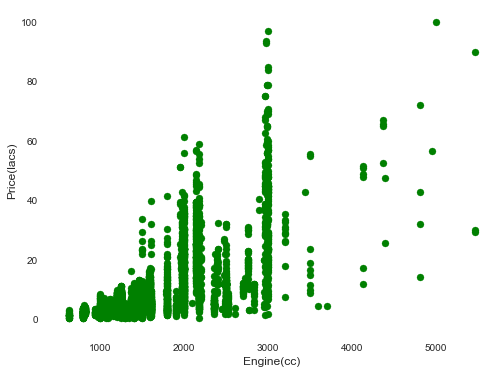

In [117]:
# Engine and Price
plt.figure(figsize=(8,6))
plt.scatter(train.Engine, train.Price, c='green')
plt.xlabel('Engine(cc)', fontsize=12)
plt.ylabel('Price(lacs)', fontsize=12)
plt.show();

**Observation**

* **Engine** also shows similar pattern as of Power when shocased with the **Price**.

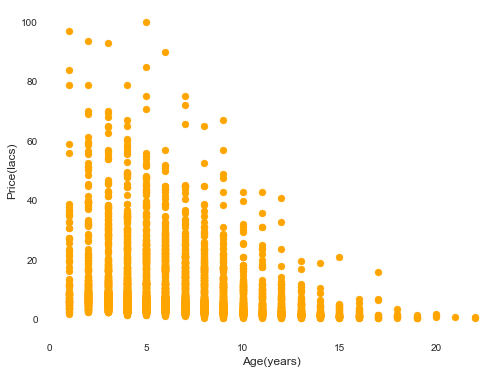

In [119]:
# Age and Price
plt.figure(figsize=(8,6))
plt.scatter(train.Age, train.Price, c='orange')
plt.xlabel('Age(years)', fontsize=12)
plt.ylabel('Price(lacs)', fontsize=12)
plt.show();

**Observation**

* Aging vehicles sells for lesser price as compared to the younger vehicles.

In [120]:
# Take backup before dropping some features
train_backup = train.copy() 
test_backup = test.copy() 

# Drop irrelevant features
drop_features = ['Location','Fuel_Type','Transmission','Owner_Type','Seats','Full_name','Name','brand']
backup_train = train.drop(drop_features, axis=1, inplace=True)
backup_test = test.drop(drop_features, axis=1, inplace=True)

In [121]:
# Assign values to variables for training and testing

X_train = train.drop(labels=['Price'], axis=1) # Assign all features except Price to X
y_train = np.log1p(train['Price'].values) # Convert Price to log scale
X_test = test.copy()

# Model training and prediction

We will use LGB because it generally trains much faster as compared to XGBoost and mostly gives equivalent or better results.

In [147]:
train_X = X_train.copy()
train_y = y_train.copy()
test_X = X_test.copy()

# Define LGBM function
def runLGB(train_X, train_y, val_X=None, val_y=None, test_X=None, dep=-1, seed=0, data_leaf=5):
    params = {}
    params["objective"] = "regression"
    params['metric'] = 'l2_root'
    params['boosting'] = 'gbdt'
#     params["max_depth"] = dep
#     params["num_leaves"] = 39
#     params["min_data_in_leaf"] = data_leaf
    params["learning_rate"] = 0.009
    params["bagging_fraction"] = 0.75
    params["feature_fraction"] = 0.75
    params["feature_fraction_seed"] = seed
    params["bagging_freq"] = 1
    params["bagging_seed"] = seed
#     params["lambda_l2"] = 5
#     params["lambda_l1"] = 5
    params["silent"] = True
    params["random_state"] = seed,
    num_rounds = 3000
    
    lgtrain = lgb.Dataset(train_X, label=train_y)

    if val_y is not None:
        lgtest = lgb.Dataset(val_X, label=val_y)
        model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=50, verbose_eval=100)
    else:
        lgtest = lgb.DMatrix(val_X)
        model = lgb.train(params, lgtrain, num_rounds)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
  
    loss = 0
    
    if val_y is not None:
        loss = sqrt(mean_squared_log_error(np.expm1(val_y), np.expm1(pred_val_y)))
        return model, loss, pred_test_y
    else:
        return model, loss, pred_test_y

## K-FOLD train

cv_scores = [] # array for keeping cv-scores for each fold.
pred_test_full = 0 # array to keep predictions of each fold.
pred_train = np.zeros(train_X.shape[0])
n_fold = 10
print(f"Building model over {n_fold} folds\n")
kf = KFold(n_splits=n_fold, shuffle=True, random_state=4)

feature_importance = pd.DataFrame()
for fold_n, (dev_index, val_index) in enumerate(kf.split(train_X, train_y)):    
    dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]

    model, loss, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=8, seed=0)
      
    pred_test_full += pred_t
    print(f"\n>>>>RMSLE for fold {fold_n+1} is: {loss}<<<<\n")
    cv_scores.append(loss)
    
    # feature importance aggregation over n folds
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = X_train.columns
    fold_importance["importance"] = model.feature_importance()
    fold_importance["fold"] = fold_n + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

Building model over 10 folds

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.347337
[200]	valid_0's rmse: 0.225776
[300]	valid_0's rmse: 0.181764
[400]	valid_0's rmse: 0.163006
[500]	valid_0's rmse: 0.154115
[600]	valid_0's rmse: 0.149672
[700]	valid_0's rmse: 0.147258
[800]	valid_0's rmse: 0.145725
[900]	valid_0's rmse: 0.144674
[1000]	valid_0's rmse: 0.144127
[1100]	valid_0's rmse: 0.143245
[1200]	valid_0's rmse: 0.142738
[1300]	valid_0's rmse: 0.142283
[1400]	valid_0's rmse: 0.142045
[1500]	valid_0's rmse: 0.141772
[1600]	valid_0's rmse: 0.14161
[1700]	valid_0's rmse: 0.141465
[1800]	valid_0's rmse: 0.141363
[1900]	valid_0's rmse: 0.141234
Early stopping, best iteration is:
[1913]	valid_0's rmse: 0.141128

>>>>RMSLE for fold 1 is: 0.14112767032636214<<<<

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.360006
[200]	valid_0's rmse: 0.223614
[300]	valid_0's rmse: 0.178196
[400]	valid_0's rmse: 0.161638
[500]	va

In [148]:
print(f"Mean RMSLE score over folds is: {np.mean(cv_scores)}")

# Aggregate mean prediction over 10 folds.
pred_test_full /= n_fold
pred_test_final = np.expm1(pred_test_full)

Mean RMSLE score over folds is: 0.13915807327333216


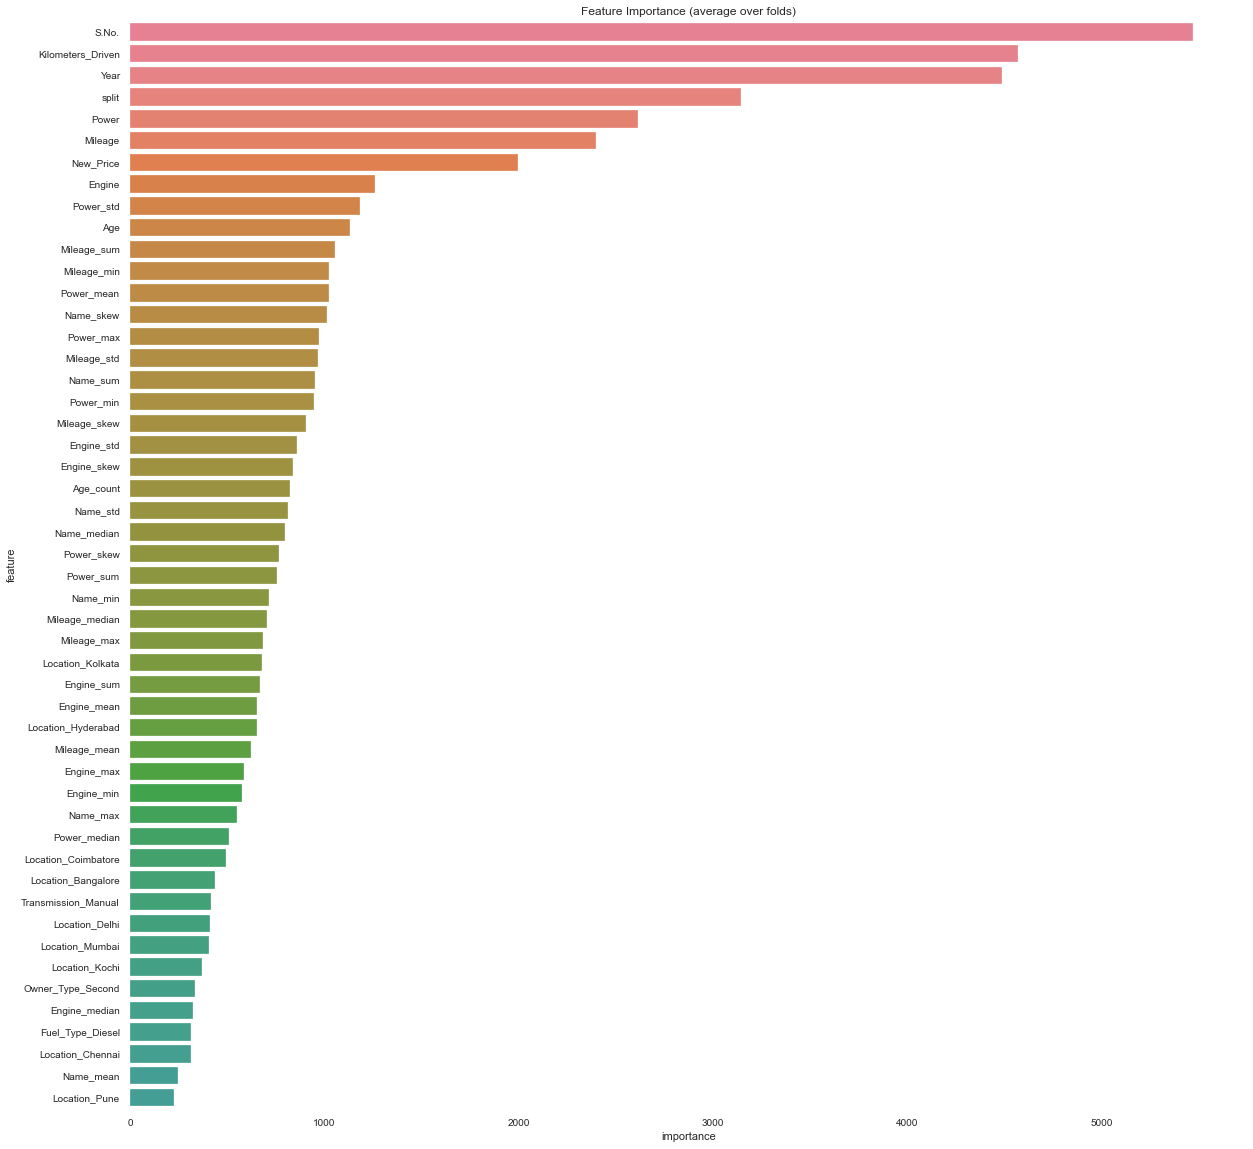

In [149]:
# Plot feature importance mean aggregated over 10 folds
plt.figure(figsize=(20, 20));
feature_importance = pd.DataFrame(feature_importance.groupby("feature")["importance"].mean().sort_values(ascending=False).reset_index())[:50]
sns.barplot(x="importance", y="feature", data=feature_importance);
plt.title('Feature Importance (average over folds)');

# Actionable Insights & Recommendations


* After analysis, we see notice that the value/cost of the car is highly dependable on the year the car was manufactured (how old the car is), the number of users and the mileage.
* The value/ cost of the car is also very dependable on the power (horsepower), size (capacity).
* For maximum profitability, I recommend the company offers used  cars that are 2-5 years old to attract more costomers.
* I also recommend selling cars by dividing them into different categories such as sporty, family car, economy and luxury car. This will ensure attraction of customers from different background/ different needs.
* Most users also tend to buy diesel cars. However, the the difference between Diesel and Petrol cars is minimal so I recommend keeping an equal inventory and completly elimination the other fuel types
* 5 seater cars are popular which will fall under luxury, sedan, SUV and sporty cars so I recommend keeping a high inventory of these.
* Some southern markets tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information. Markets like Kolkata(coeff = -0.2) are very risky and we need to be careful about investments in this area.
* We will have to analyse the cost side of things before we can talk about profitability in the business. We should gather data regarding that.